# Importing modules

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Uploading data


In [28]:
#uploading data

data = pd.read_csv('train.csv', sep = ',')

In [29]:
# checking random lines
data.iloc[[6, 148, 324, 900, 1233, 3000, 4680, 5001], ]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
148,1,19.20,19.2,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
324,29,98.60,2933.2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
900,64,102.10,6688.1,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,0
1233,15,101.75,1669.4,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,0
3000,70,19.80,1378.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4680,24,94.60,2283.15,Female,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
5001,19,79.85,1471.75,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1


In [30]:
#checking data shape
data.shape

(5282, 20)

In [31]:
# Lists with column names

# Numerical features
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical features
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [32]:
# checking data types

In [33]:
# fixing data types
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')

In [34]:
# checking NAs
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [35]:
# filling NAs with zeros
data['TotalSpent'] = data['TotalSpent'].fillna(0)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [36]:
# checking values of categorical features
numeric_data = data[num_cols]
cat_data = data[cat_cols]
for i in cat_cols:
  print(i, data[i].unique())

Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']




# Data Analysis


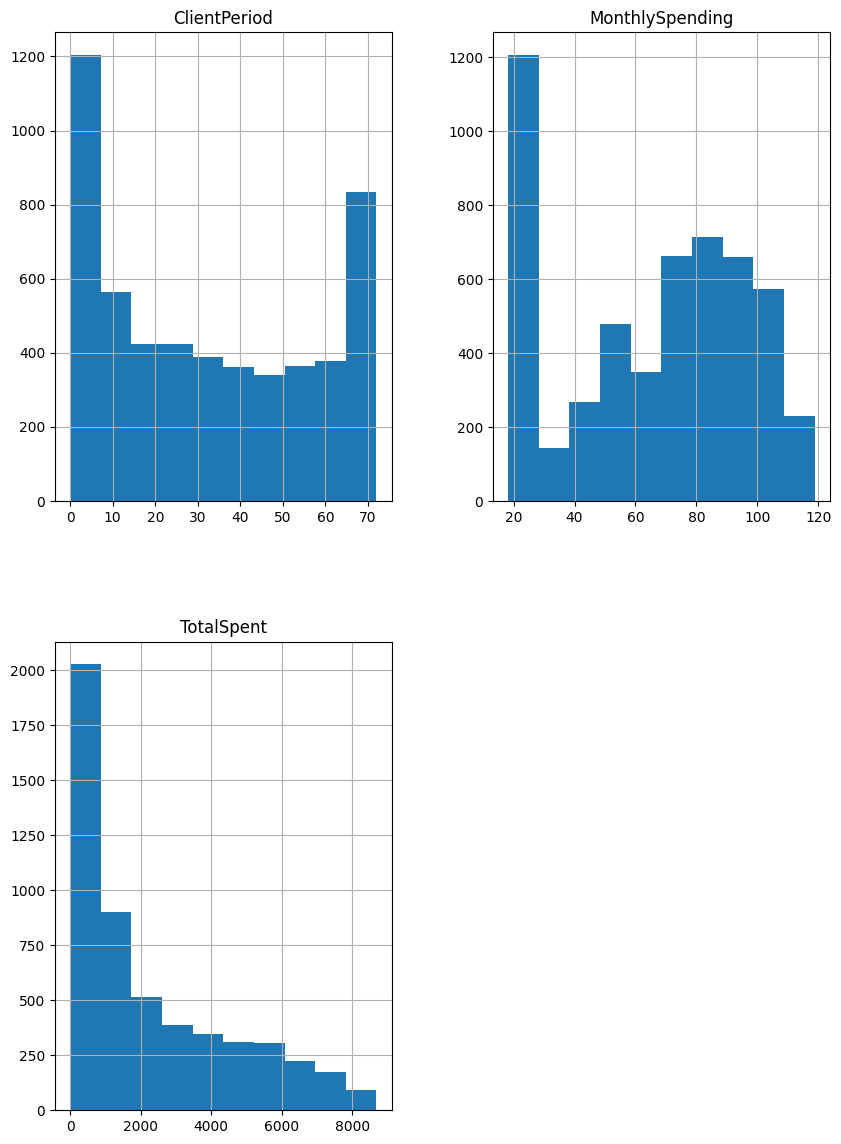

In [37]:
#building histograms for numerical features
data.hist(column = num_cols, figsize = (10, 14))
None

In [38]:

for i in cat_cols:
  print(data[i].value_counts())

Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64
No    

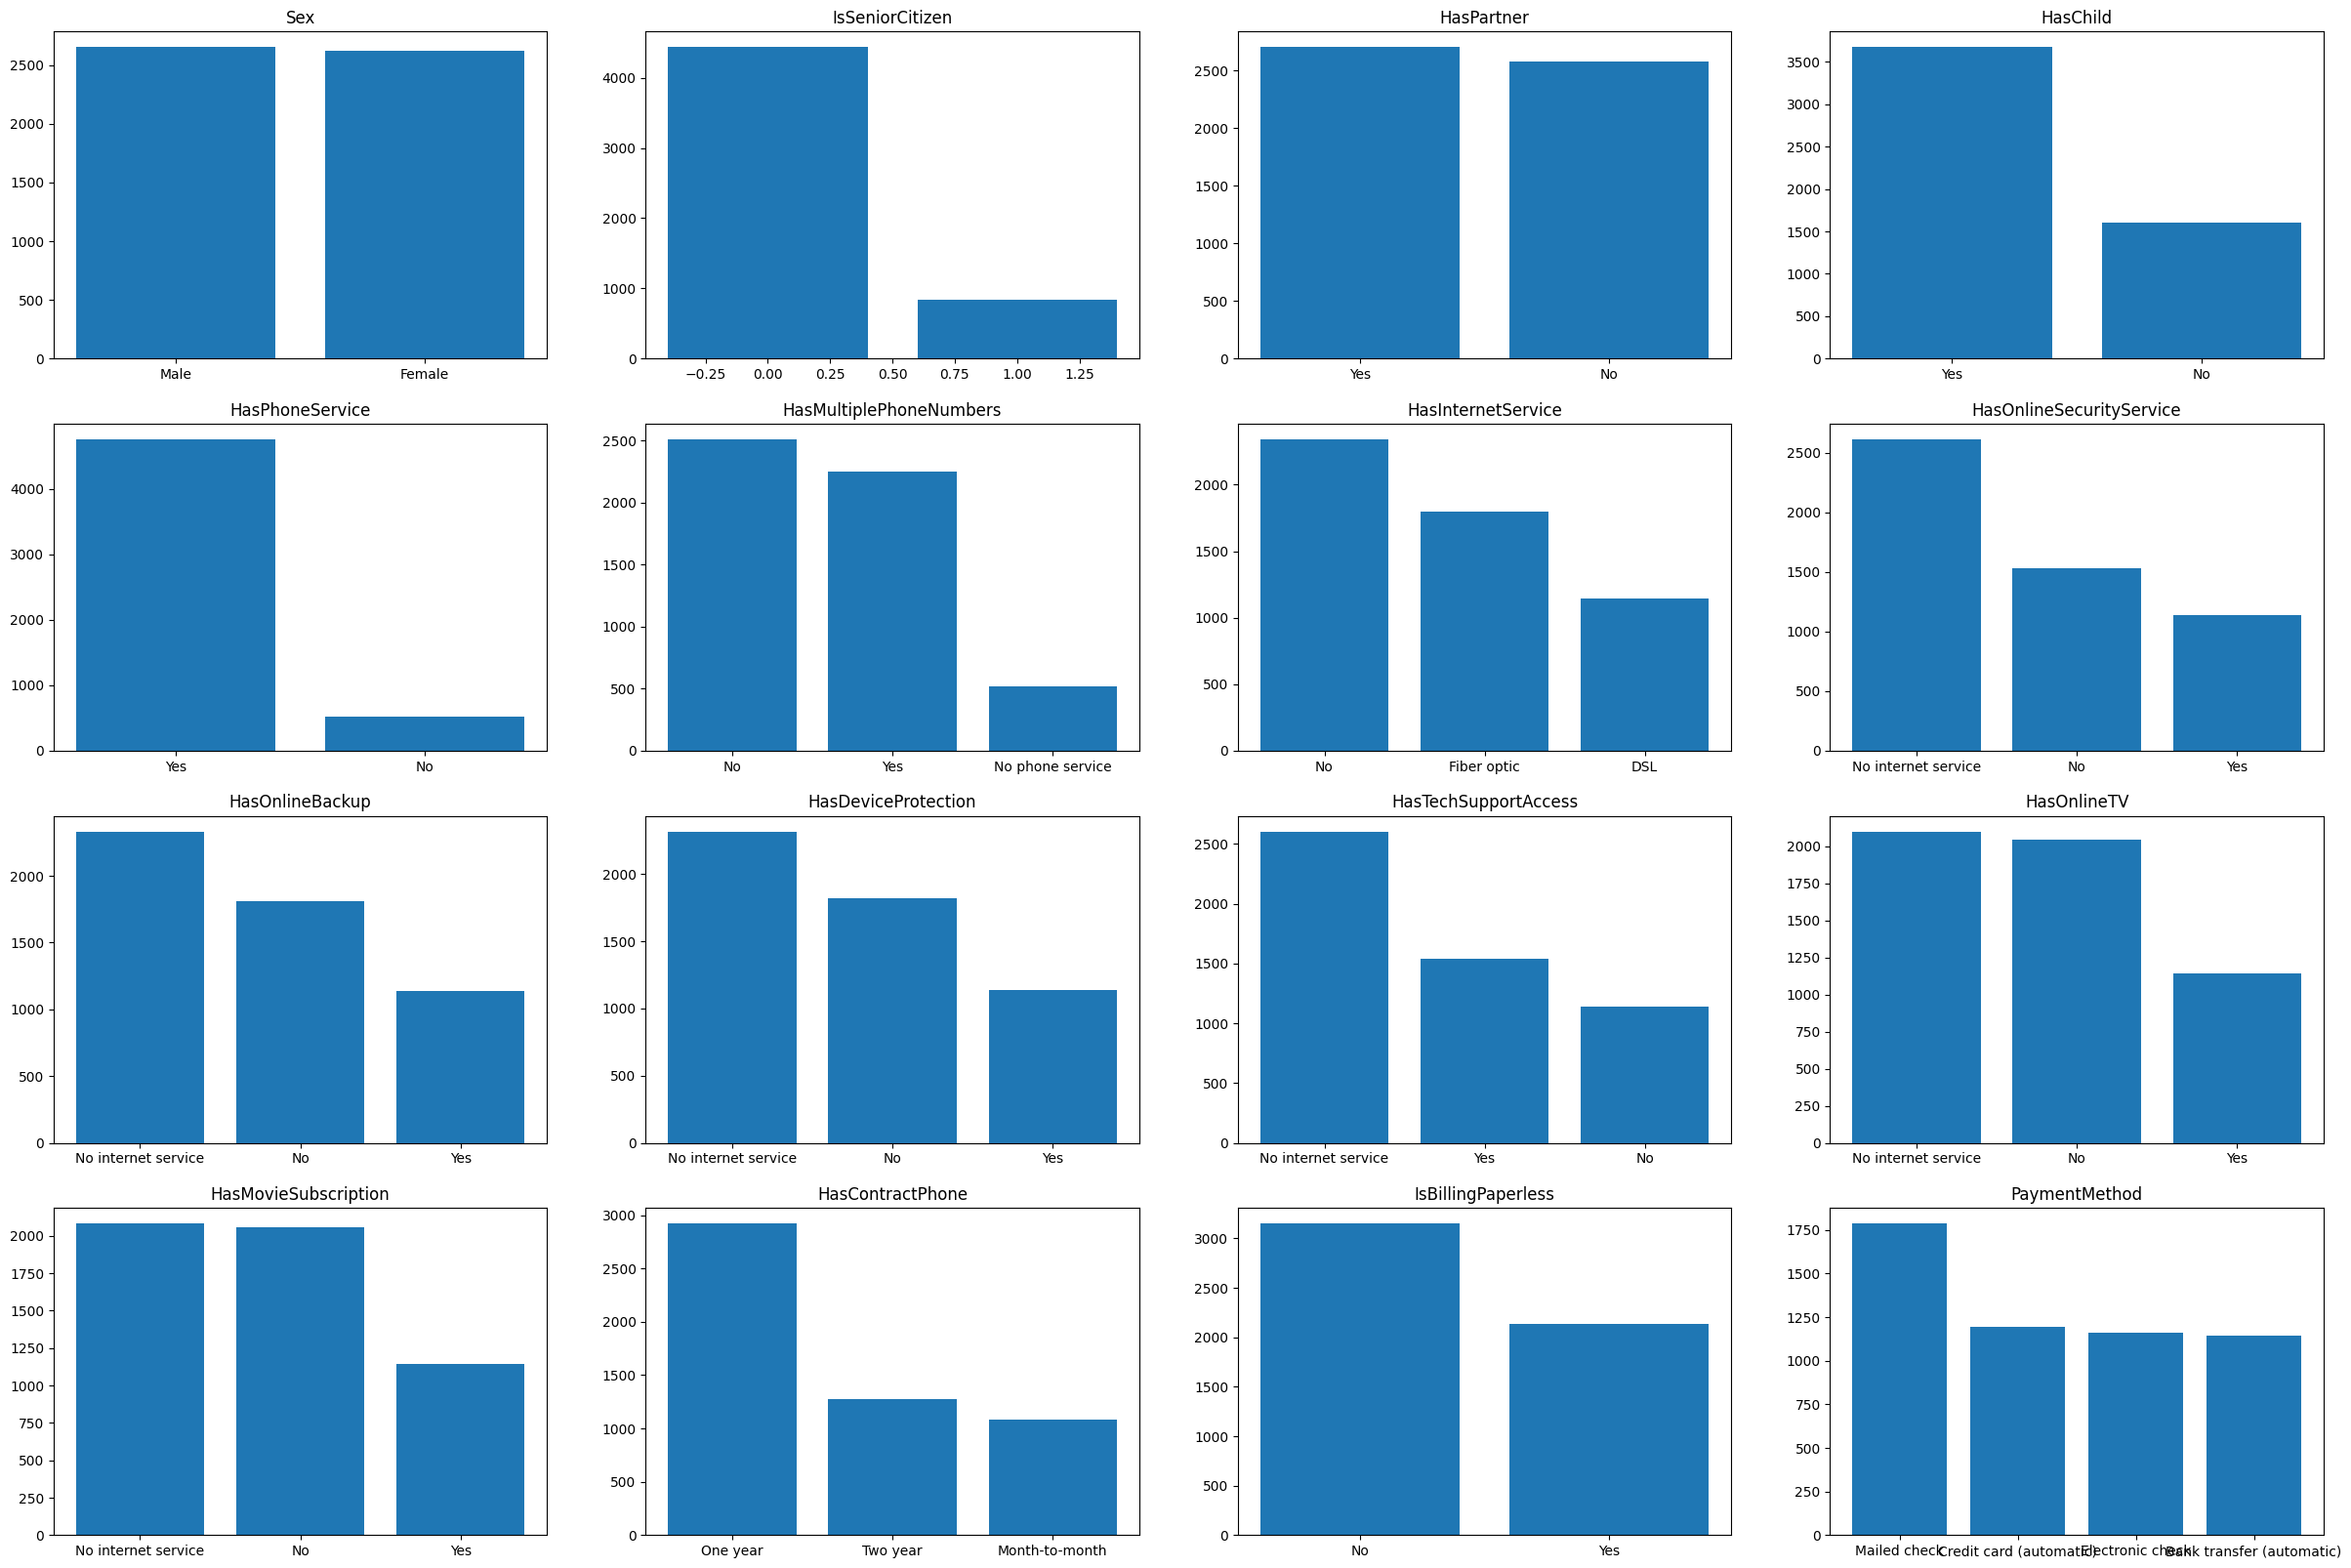

In [39]:
f = plt.figure(figsize = (30, 20))

i = 1
for col in cat_cols:
    plt.subplot(4, 4, i)
    plt.bar(data[col].unique(), data[col].value_counts())
    plt.title(col)
    i += 1

0    0.737978
1    0.262022
Name: Churn, dtype: float64

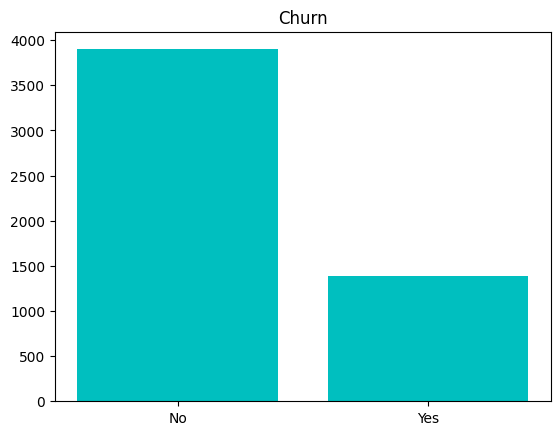

In [40]:
#checking how target column is distributed
plt.bar(['No', "Yes"], data['Churn'].value_counts(), color = 'c')
plt.title("Churn")
data['Churn'].value_counts() / len(data)


In [41]:
#checking if there's correlation between numerical features
numeric_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#TotalSpent correlates with ClientPeriod and MonthlySpending

<ipython-input-41-58769c519aaf>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  numeric_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.00,0.25,0.83
MonthlySpending,0.25,1.00,0.65
TotalSpent,0.83,0.65,1.00


In [42]:
# making categorical variable
for i in range(0, len(data)):
  data.iloc[i, 4] = 'Yes' if data.iloc[i, 4] == 1 else 'No'

In [43]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [44]:
#changing cat_data
cat_data = data[cat_cols]

In [45]:

cat_data.head(100)

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,No,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Two year,Yes,Mailed check
96,Female,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic)
97,Male,No,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
98,Female,No,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)


In [46]:
#coding categorical features
dummy_features = pd.get_dummies(cat_data)
dummy_features.head()

,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [47]:
pd.concat([data[num_cols], dummy_features, data['Churn']], axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-47-894d42bec4d8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.concat([data[num_cols], dummy_features, data['Churn']], axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
ClientPeriod,1.00,0.25,0.83,-0.01,0.01,-0.01,0.01,-0.37,0.37,-0.15,0.15,-0.01,0.01,-0.32,-0.01,0.33,0.02,0.02,-0.04,-0.27,-0.04,0.33,-0.31,-0.04,0.36,-0.32,-0.04,0.36,-0.26,-0.04,0.32,-0.24,-0.04,0.28,-0.26,-0.04,0.29,-0.65,0.20,0.56,-0.01,0.01,0.23,0.23,-0.21,-0.22,-0.35
MonthlySpending,0.25,1.00,0.65,0.01,-0.01,-0.22,0.22,-0.09,0.09,0.13,-0.13,-0.25,0.25,-0.33,-0.25,0.49,-0.17,0.79,-0.76,0.36,-0.76,0.30,0.21,-0.76,0.44,0.17,-0.76,0.48,0.32,-0.76,0.33,0.01,-0.76,0.63,0.01,-0.76,0.63,0.06,0.00,-0.07,-0.34,0.34,0.04,0.04,0.26,-0.37,0.18
TotalSpent,0.83,0.65,1.00,-0.01,0.01,-0.09,0.09,-0.31,0.31,-0.05,0.05,-0.12,0.12,-0.39,-0.12,0.47,-0.05,0.36,-0.38,-0.07,-0.38,0.42,-0.18,-0.38,0.51,-0.19,-0.38,0.53,-0.08,-0.38,0.43,-0.20,-0.38,0.51,-0.21,-0.38,0.53,-0.44,0.16,0.36,-0.16,0.16,0.18,0.19,-0.06,-0.29,-0.20
Sex_Female,-0.01,0.01,-0.01,1.00,-1.00,0.01,-0.01,0.00,-0.00,0.01,-0.01,-0.01,0.01,0.00,-0.01,0.00,0.00,0.00,-0.01,-0.01,-0.01,0.01,-0.00,-0.01,0.01,0.00,-0.01,0.00,-0.01,-0.01,0.02,-0.01,-0.01,0.02,-0.00,-0.01,0.01,-0.00,-0.01,0.01,-0.02,0.02,0.01,0.01,-0.00,-0.01,0.01
Sex_Male,0.01,-0.01,0.01,-1.00,1.00,-0.01,0.01,-0.00,0.00,-0.01,0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.01,0.01,0.01,-0.01,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.01,0.01,-0.02,0.01,0.01,-0.02,0.00,0.01,-0.01,0.00,0.01,-0.01,0.02,-0.02,-0.01,-0.01,0.00,0.01,-0.01
IsSeniorCitizen_No,-0.01,-0.22,-0.09,0.01,-0.01,1.00,-1.00,0.02,-0.02,-0.22,0.22,0.01,-0.01,0.13,0.01,-0.14,0.10,-0.25,0.18,-0.18,0.18,0.04,-0.08,0.18,-0.07,-0.10,0.18,-0.05,-0.20,0.18,0.05,-0.05,0.18,-0.10,-0.03,0.18,-0.12,-0.14,0.05,0.12,0.15,-0.15,0.01,0.03,-0.17,0.15,-0.16
IsSeniorCitizen_Yes,0.01,0.22,0.09,-0.01,0.01,-1.00,1.00,-0.02,0.02,0.22,-0.22,-0.01,0.01,-0.13,-0.01,0.14,-0.10,0.25,-0.18,0.18,-0.18,-0.04,0.08,-0.18,0.07,0.10,-0.18,0.05,0.20,-0.18,-0.05,0.05,-0.18,0.10,0.03,-0.18,0.12,0.14,-0.05,-0.12,-0.15,0.15,-0.01,-0.03,0.17,-0.15,0.16
HasPartner_No,-0.37,-0.09,-0.31,0.00,-0.00,0.02,-0.02,1.00,-1.00,0.44,-0.44,0.00,-0.00,0.13,0.00,-0.13,-0.00,0.01,-0.00,0.13,-0.00,-0.14,0.13,-0.00,-0.13,0.15,-0.00,-0.15,0.11,-0.00,-0.12,0.12,-0.00,-0.12,0.12,-0.00,-0.12,0.28,-0.08,-0.25,-0.01,0.01,-0.11,-0.08,0.09,0.09,0.15
HasPartner_Yes,0.37,0.09,0.31,-0.00,0.00,-0.02,0.02,-1.00,1.00,-0.44,0.44,-0.00,0.00,-0.13,-0.00,0.13,0.00,-0.01,0.00,-0.13,0.00,0.14,-0.13,0.00,0.13,-0.15,0.00,0.15,-0.11,0.00,0.12,-0.12,0.00,0.12,-0.12,0.00,0.12,-0.28,0.08,0.25,0.01,-0.01,0.11,0.08,-0.09,-0.09,-0.15
HasChild_No,-0.15,0.13,-0.05,0.01,-0.01,-0.22,0.22,0.44,-0.44,1.00,-1.00,-0.01,0.01,-0.02,-0.01,0.03,-0.05,0.17,-0.15,0.20,-0.15,-0.08,0.14,-0.15,-0.02,0.13,-0.15,-0.00,0.18,-0.15,-0.06,0.10,-0.15,0.02,0.09,-0.15,0.03,0.23,-0.07,-0.20,-0.10,0.10,-0.04,-0.06,0.15,-0.06,0.16


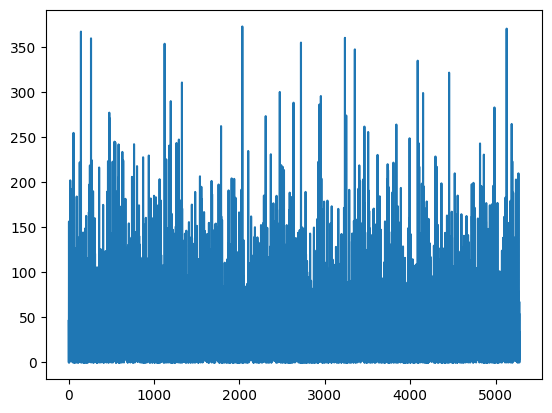

In [48]:
#trying to predict TotalSpent with MonthlySpending*ClientPeriod
y1 = data['MonthlySpending'] * data['ClientPeriod']
y2 = data['TotalSpent']
d = y2 - y1
plt.plot(abs(d))


In [49]:
#creating new variable which shows difference between real and predicted spending
newcol = pd.Series(data['TotalSpent'] - data['ClientPeriod'] * data['MonthlySpending'])

In [50]:
data['Difference'] = newcol

In [51]:
import seaborn

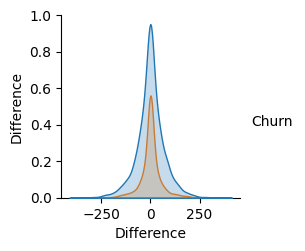

In [54]:
#checking how well a target variable can be broken by the new variable Difference
seaborn.pairplot( data = pd.concat([data['Difference'], data['Churn']], axis = 1), hue = 'Churn')

In [55]:
# removing Difference
data = data.drop(['Difference'], axis = 1)

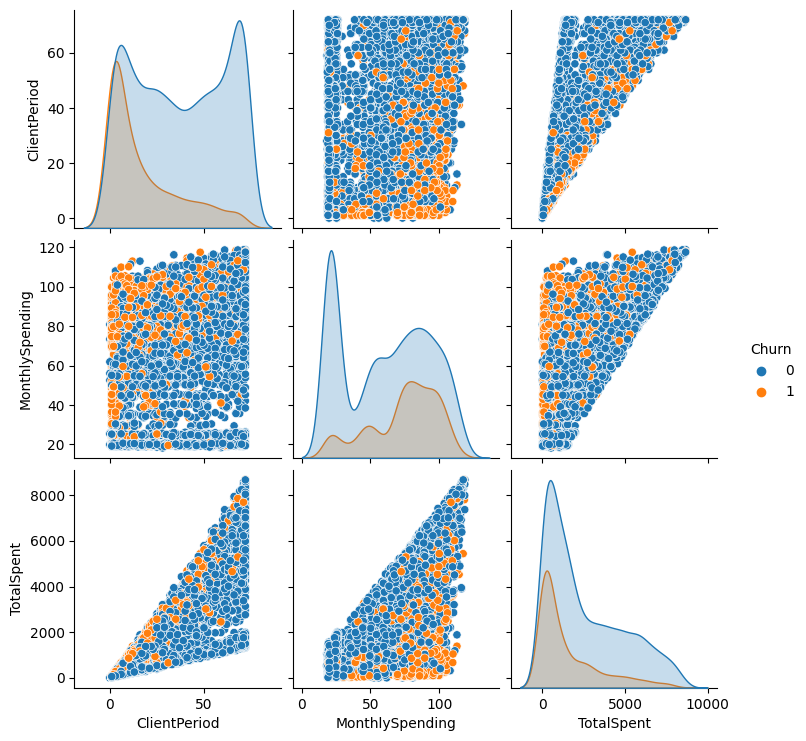

In [57]:
# seeing how target variable is distributed with each pair of numerical features
seaborn.pairplot(data = pd.concat([numeric_data, data['Churn']], axis = 1), hue = 'Churn')

In [58]:
seaborn.set()

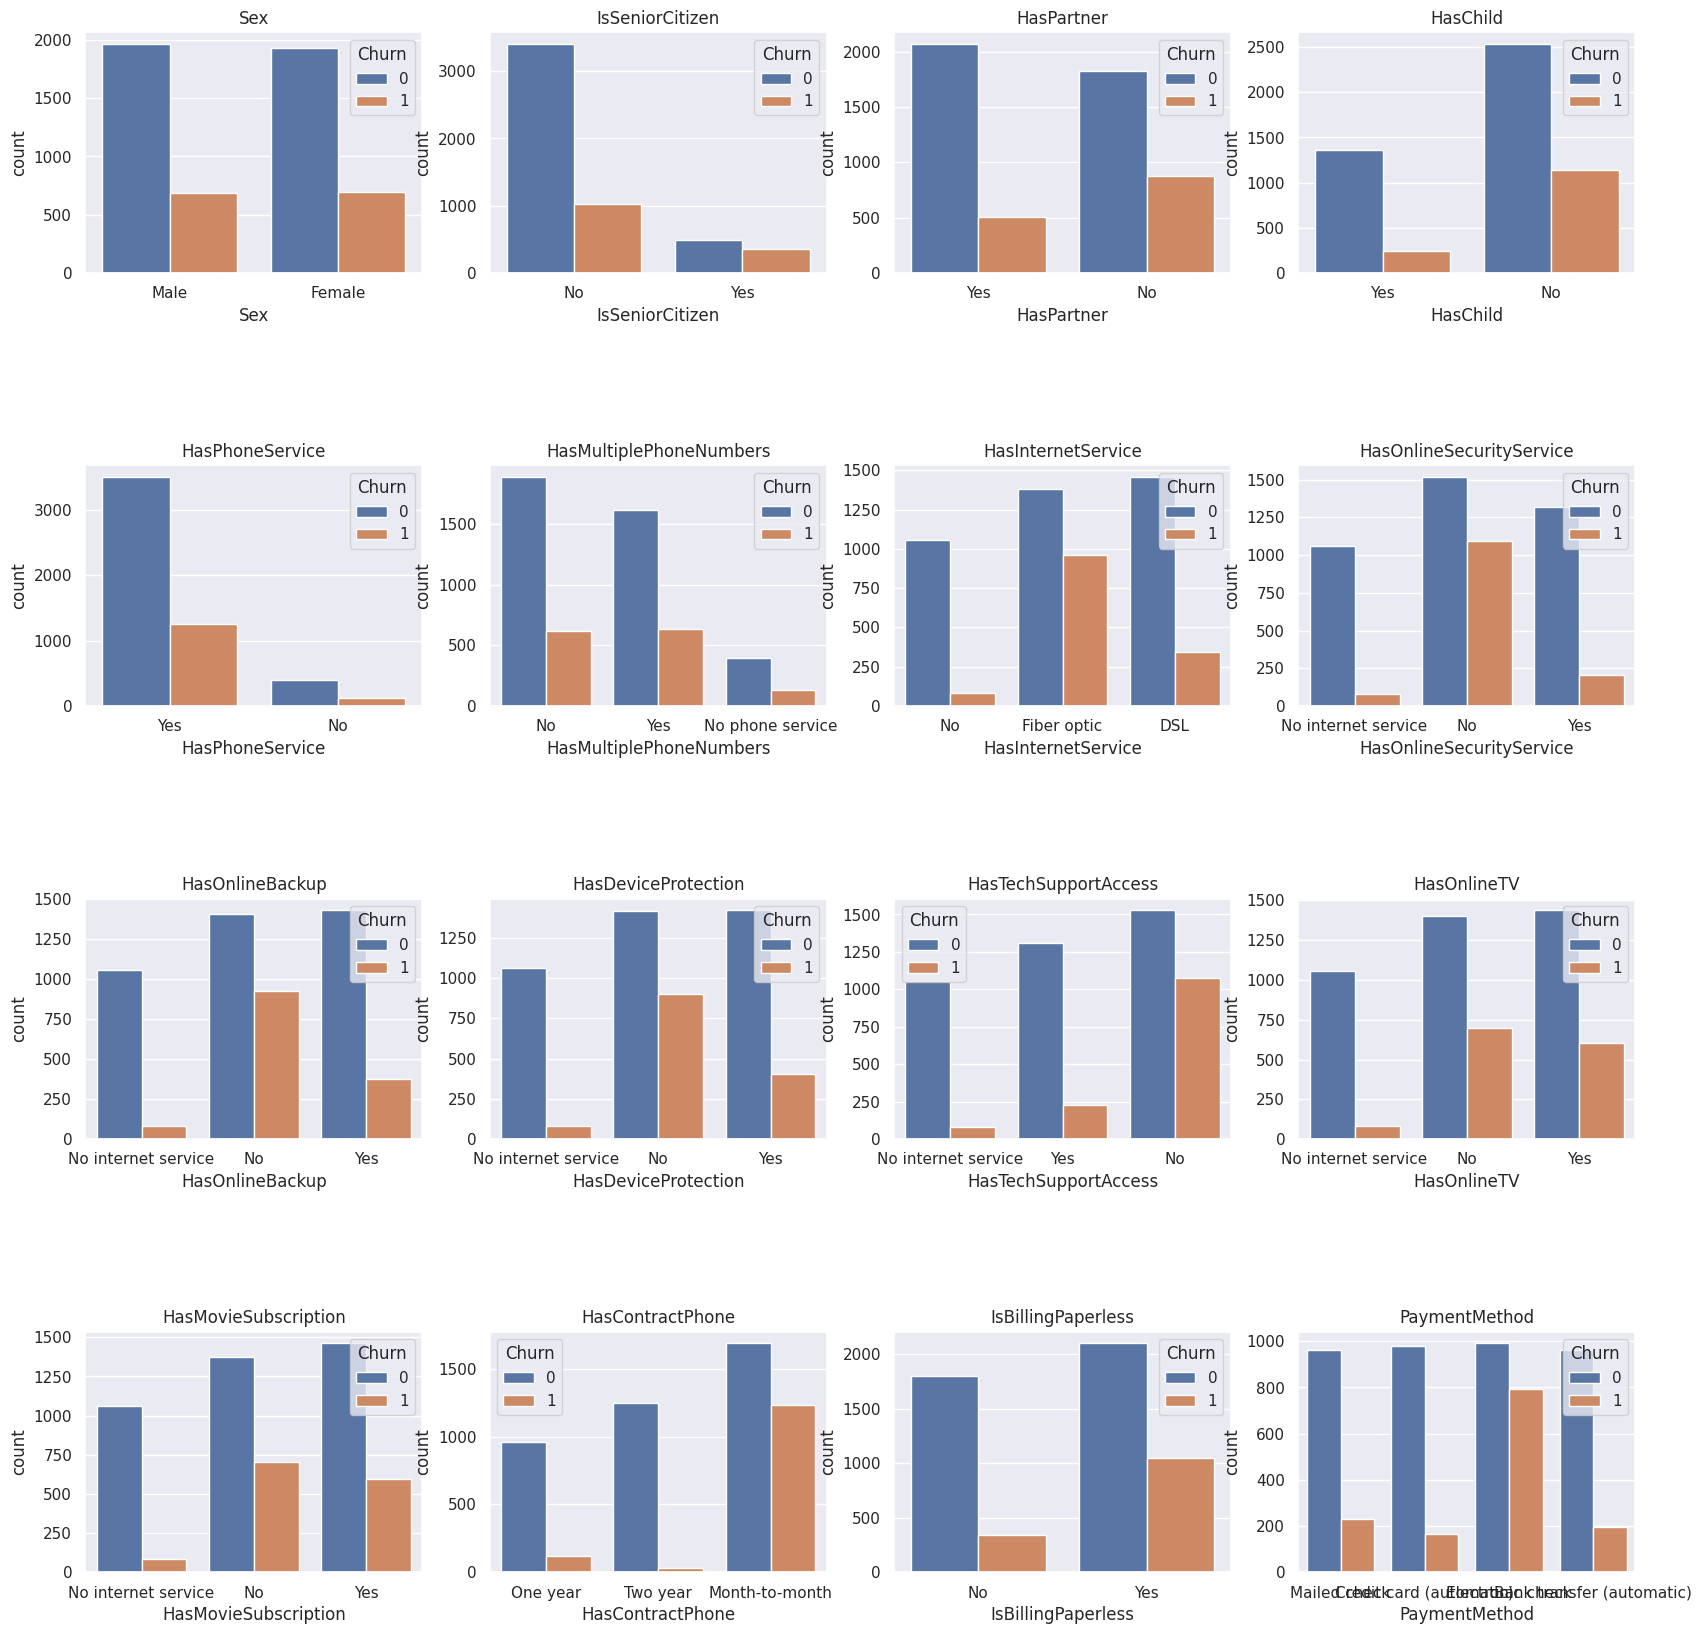

In [59]:
fig = plt.figure(figsize = (20, 20))
i = 1
for col in cat_cols:
    plt.subplot(4, 4, i)
    seaborn.countplot(x = col, data = data,  hue = 'Churn')
    plt.title(col)
    plt.subplots_adjust(hspace = 0.8)
    i += 1


## Applying Linear Models



In [60]:
#creating new categorical features

In [61]:
dummy_features.head()

,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [62]:
#creating new features
HasNoTechSupportAccess = pd.Series(dummy_features['HasTechSupportAccess_No'])
HasNoMovieSubscription = pd.Series(dummy_features['HasMovieSubscription_No'])
PaymentMethodElCheck = pd.Series(dummy_features['PaymentMethod_Electronic check'])

In [63]:

for i in range(0, len(data)):
  HasNoTechSupportAccess[i] = 'Yes' if HasNoTechSupportAccess[i] == 1 else 'No'
  HasNoMovieSubscription[i] = 'Yes' if HasNoMovieSubscription[i] == 1 else 'No'
  PaymentMethodElCheck[i] = 'Yes' if PaymentMethodElCheck[i] == 1 else 'No'

In [64]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen              object
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [65]:
#new categorical features for new dataset
cat_cols_mod = ['IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup',
                'HasDeviceProtection', 'HasContractPhone', 'IsBillingPaperless']

In [66]:
#new numerical features for new dataset

num_cols_mod = ['ClientPeriod', 'MonthlySpending']

In [67]:
cat_data_mod = data[cat_cols_mod]

In [68]:
num_data_mod = data[num_cols_mod]

In [69]:
#adding new columns
mod = data
mod['HasNoTechSupportAccess'] = HasNoTechSupportAccess
mod['HasNoMovieSubscription'] = HasNoMovieSubscription
mod['PaymentMethodElCheck'] = PaymentMethodElCheck

In [70]:
mod['HasNoTechSupportAccess']

0        No
1        No
2        No
3       Yes
4        No
       ... 
5277     No
5278     No
5279     No
5280    Yes
5281     No
Name: HasNoTechSupportAccess, Length: 5282, dtype: object

In [71]:
#rewriting the dataset
cat_data_mod = mod[['IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup',
                'HasDeviceProtection', 'HasContractPhone', 'IsBillingPaperless', 'HasNoTechSupportAccess', 'HasNoMovieSubscription', 'PaymentMethodElCheck']]

In [72]:
# one-hot-encoding
dummy_features_mod = pd.get_dummies(cat_data_mod)

In [73]:
dummy_features_mod.dtypes

IsSeniorCitizen_No                              uint8
IsSeniorCitizen_Yes                             uint8
HasPartner_No                                   uint8
HasPartner_Yes                                  uint8
HasChild_No                                     uint8
HasChild_Yes                                    uint8
HasInternetService_DSL                          uint8
HasInternetService_Fiber optic                  uint8
HasInternetService_No                           uint8
HasOnlineSecurityService_No                     uint8
HasOnlineSecurityService_No internet service    uint8
HasOnlineSecurityService_Yes                    uint8
HasOnlineBackup_No                              uint8
HasOnlineBackup_No internet service             uint8
HasOnlineBackup_Yes                             uint8
HasDeviceProtection_No                          uint8
HasDeviceProtection_No internet service         uint8
HasDeviceProtection_Yes                         uint8
HasContractPhone_Month-to-mo

In [74]:
#removing one column because of correlation
dummy_features_mod = dummy_features_mod.drop(labels = ['HasOnlineSecurityService_No internet service', 'HasOnlineBackup_No internet service',
                                                      'HasDeviceProtection_No internet service'], axis = 1)

In [75]:
#concatenating columns
mod_full = pd.concat([num_data_mod, dummy_features_mod, data['Churn']], axis = 1)

In [76]:
#it's weird to see TotalSpent = 0 with ClientPeriod = 0
data.query("TotalSpent == 0")

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,HasNoTechSupportAccess,HasNoMovieSubscription,PaymentMethodElCheck
1048,0,25.75,0.0,Male,No,Yes,Yes,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,No,No,No
1707,0,73.35,0.0,Female,No,Yes,Yes,Yes,Yes,DSL,...,Yes,Yes,No,Two year,No,Mailed check,0,No,Yes,No
2543,0,19.70,0.0,Male,No,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0,No,No,No
3078,0,80.85,0.0,Female,No,Yes,Yes,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Mailed check,0,Yes,No,No
3697,0,20.00,0.0,Female,No,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,No,No,No
4002,0,61.90,0.0,Male,No,No,Yes,Yes,Yes,DSL,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),0,No,Yes,No
4326,0,25.35,0.0,Male,No,Yes,Yes,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,No,No,No
4551,0,52.55,0.0,Female,No,Yes,Yes,No,No phone service,DSL,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0,No,Yes,No
4598,0,56.05,0.0,Female,No,Yes,Yes,No,No phone service,DSL,...,Yes,Yes,No,Two year,No,Credit card (automatic),0,No,Yes,No


In [77]:
#keeping these indices to further remove these lines
indices = [1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598]


In [78]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [79]:
#removing the lines
mod_full = mod_full.drop(indices, axis = 0)
X_mod = mod_full.drop('Churn', axis = 1)
y_mod = mod_full['Churn']
X_mod.shape, y_mod.shape

((5273, 28), (5273,))

In [80]:
y_mod.value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

In [81]:
#preparing dataset for training
X_train, X_test, y_train, y_test = train_test_split(X_mod.values, y_mod.values,
                                                    train_size=0.8)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# model
clf = LogisticRegression(max_iter = 10000000, solver = 'saga')

# parameters for gridsearch
param_grid = {
    'C': [100, 10, 1, 1.2, 1.1, 1.3, 1.4, 1.7,  0.1, 0.001, 0.01, 0.005, 0.009, 0.0086], 'penalty' : ['l1', 'l2']

}

# object GridSearchCV
search = GridSearchCV(clf, param_grid, refit = True, cv = 5, scoring= 'roc_auc')


search.fit(X_train_scaled, y_train)

# printing best parameters
print(search.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [82]:
#running logistic regression with best parameters
logr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga')
logr.fit(X_train_scaled, y_train)
pred = logr.predict_proba(X_test_scaled)

from sklearn.metrics import roc_auc_score, roc_curve
y_train_predicted = logr.predict_proba(X_train_scaled)[:, 1]
y_test_predicted = logr.predict_proba(X_test_scaled)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc, test_auc)

0.844470270290651 0.8406736596736597


Best quality was achieved with parameters{'C': 0.1, 'penalty': 'l1'} using solver saga:

 0.84 (train) 0.84 (test)

## Gradient Boosting



In [83]:
!pip install catboost
import catboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00


In [84]:
#splitting the data
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_mod.values, y_mod.values,
                                                    train_size=0.8)

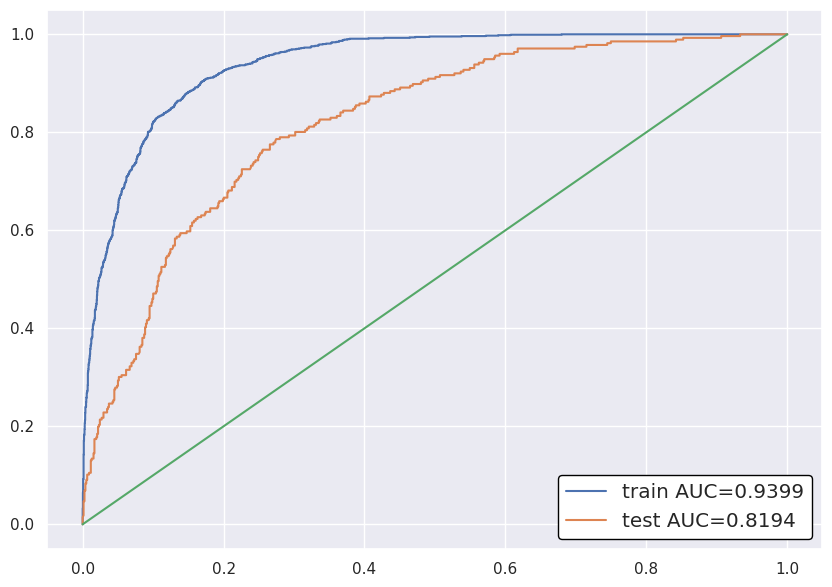

In [85]:
#trying catboost with standard parameters

boosting_model = catboost.CatBoostClassifier(verbose = False)


boosting_model.fit(X_train_cat, y_train_cat)

y_train_predicted = boosting_model.predict_proba(X_train_cat)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_cat)[:, 1]
train_auc = roc_auc_score(y_train_cat, y_train_predicted)
test_auc = roc_auc_score(y_test_cat, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_cat, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_cat, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [86]:
#попробуем поискать лучшие параметры по сетке
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_mod.values, y_mod.values,
                                                    train_size=0.8)

param_grid = {'n_estimators' : [50, 60, 65, 70, 75, 80, 85, 100, 120],
              'learning_rate' : [0.01, 0.05, 0.07, 0.08, 0.1, 0.11, 0.13, 0.005, 0.2, 0.4, 0.5],
              'depth' : [1, 2, 3]



             }

model = catboost.CatBoostClassifier()
grid_search_result = model.grid_search(param_grid,
                                       X= X_train_origin,
                                       y= y_train_origin, refit = True, cv = 5
                                        )
grid_search_result['params']

Выходные данные были обрезаны до нескольких последних строк (5000).
16:	learn: 0.3931517	test: 0.4226698	best: 0.4223853 (14)	total: 27.3ms	remaining: 93.2ms
17:	learn: 0.3927367	test: 0.4225668	best: 0.4223853 (14)	total: 29ms	remaining: 91.8ms
18:	learn: 0.3918306	test: 0.4225498	best: 0.4223853 (14)	total: 33ms	remaining: 97.3ms
19:	learn: 0.3907598	test: 0.4228990	best: 0.4223853 (14)	total: 34.6ms	remaining: 95.1ms
20:	learn: 0.3898607	test: 0.4228916	best: 0.4223853 (14)	total: 36.6ms	remaining: 94ms
21:	learn: 0.3893320	test: 0.4224157	best: 0.4223853 (14)	total: 38.2ms	remaining: 92ms
22:	learn: 0.3886154	test: 0.4228387	best: 0.4223853 (14)	total: 39.8ms	remaining: 90.1ms
23:	learn: 0.3875656	test: 0.4247739	best: 0.4223853 (14)	total: 41.3ms	remaining: 87.7ms
24:	learn: 0.3869252	test: 0.4246637	best: 0.4223853 (14)	total: 42.8ms	remaining: 85.5ms
25:	learn: 0.3851646	test: 0.4240270	best: 0.4223853 (14)	total: 44.2ms	remaining: 83.3ms
26:	learn: 0.3842231	test: 0.4242539	bes

{'depth': 3, 'iterations': 75, 'learning_rate': 0.1}

0:	learn: 0.6332872	total: 4.27ms	remaining: 316ms
1:	learn: 0.5923497	total: 8.81ms	remaining: 322ms
2:	learn: 0.5578967	total: 13.3ms	remaining: 319ms
3:	learn: 0.5319977	total: 17.7ms	remaining: 315ms
4:	learn: 0.5131048	total: 27.2ms	remaining: 380ms
5:	learn: 0.4964000	total: 32ms	remaining: 368ms
6:	learn: 0.4814085	total: 36.6ms	remaining: 355ms
7:	learn: 0.4709829	total: 42.1ms	remaining: 353ms
8:	learn: 0.4612548	total: 46.4ms	remaining: 340ms
9:	learn: 0.4541059	total: 51.4ms	remaining: 334ms
10:	learn: 0.4477499	total: 56.1ms	remaining: 327ms
11:	learn: 0.4422515	total: 60.9ms	remaining: 320ms
12:	learn: 0.4380154	total: 66.9ms	remaining: 319ms
13:	learn: 0.4348074	total: 69.6ms	remaining: 303ms
14:	learn: 0.4311853	total: 71.9ms	remaining: 288ms
15:	learn: 0.4285692	total: 76.2ms	remaining: 281ms
16:	learn: 0.4256193	total: 85.3ms	remaining: 291ms
17:	learn: 0.4239035	total: 91.5ms	remaining: 290ms
18:	learn: 0.4222918	total: 95.8ms	remaining: 282ms
19:	learn: 0.4210008	tot

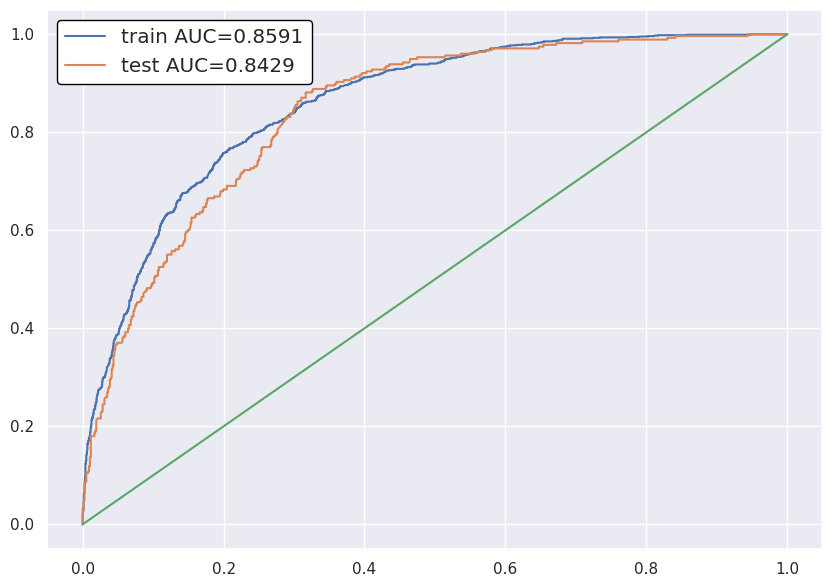

In [88]:
#applying new parameters
boosting_model = catboost.CatBoostClassifier(learning_rate = 0.1, depth =3, iterations= 75)


boosting_model.fit(X_train_origin, y_train_origin)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train_origin, y_train_predicted)
test_auc = roc_auc_score(y_test_origin, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_origin, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_origin, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

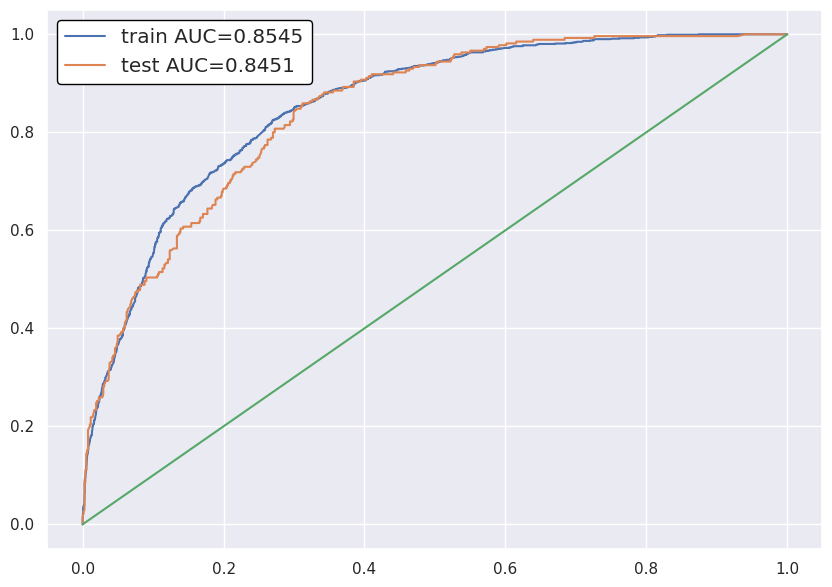

In [89]:
#trying xgboost
import xgboost as xgb

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_mod.values, y_mod.values,
                                                    train_size=0.8,
                                                    random_state=42)
boosting_model = xgb.XGBClassifier(max_depth = 1, learning_rate = 0.4, n_estimators= 60)

boosting_model.fit(X_train_new, y_train_new)

y_train_predicted = boosting_model.predict_proba(X_train_new)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_new)[:, 1]
train_auc = roc_auc_score(y_train_new, y_train_predicted)
test_auc = roc_auc_score(y_test_new, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_new, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_new, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Best quality was achieved on catboost, so this will be the final model.

In [90]:
boosting_model.save_model("model")
